In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
# from matplotlib.colors import ListedColormap
import seaborn as sns
import glob
import json
import os

### Font

In [2]:
font_24 = {'family': 'DejaVu Sans',
        'color':  'black',
        'size': 24,
        }

font_32 = {'family': 'DejaVu Sans',
        'color':  'black',
        'size': 32,
        }

font_16 = {'family': 'DejaVu Sans',
        'color':  'black',
        'size': 16,
        }

font_12 = {'family': 'DejaVu Sans',
        'color':  'black',
        'size': 12,
        }

# Color

(0.5, 2)

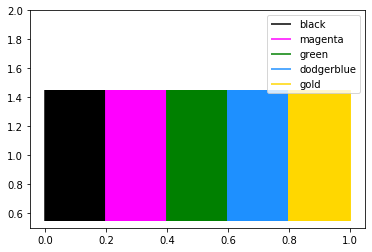

In [3]:
# digonto vai nature paper
colors = ['black', 'magenta', 'green', 'deepskyblue', 'orange']

colors = ['black', 'magenta', 'green', 'dodgerblue', 'gold']

# ok 1
# colors = ['black', 'purple', 'magenta', 'green', 'dodgerblue', 'orange', 'gold']

spikes = np.linspace(0, 1, 2000)
size=spikes.shape[0]//len(colors)

for a in range(len(colors)):
    plt.eventplot(spikes[a*size:(a+1)*size], orientation='horizontal', linelengths=0.9, color = colors[a], label=colors[a])
    pass
# plt.show()
plt.legend()
plt.ylim([0.5,2])

### directories

In [4]:
out_img_dir = "../figures/"
in_data_dir = "../data/site-percolation/"

In [5]:
os.listdir(in_data_dir)

['critical',
 'sq_lattice_site_percolation_periodic__entropy_by_site_350_2018.7.25_23.15.6.txt',
 'sq_lattice_site_percolation_periodic__350_2018.6.28_17.42.50.txt',
 'sq_lattice_site_percolation_periodic__entropy_by_site_400_2018.7.26_11.48.57.txt',
 'sq_lattice_site_percolation_periodic__entropy_by_site_300_2018.7.25_23.13.38.txt',
 'sq_lattice_site_percolation_periodic__entropy_by_site_150_2018.7.25_15.44.46.txt',
 'sq_lattice_site_percolation_periodic__400_2018.6.30_7.51.51.txt',
 'sq_lattice_site_percolation_periodic__350_2018.6.29_14.55.27.txt',
 'sq_lattice_site_percolation_periodic__entropy_by_site_350_2018.7.26_7.29.41.txt',
 'sq_lattice_site_percolation_periodic__250_2018.6.26_0.18.11.txt',
 'sq_lattice_site_percolation_periodic__entropy_by_site_300_2018.7.26_1.17.38.txt',
 'sq_lattice_site_percolation_periodic__entropy_by_site_350_2018.7.25_23.15.4.txt',
 'sq_lattice_site_percolation_periodic__entropy_by_site_400_2018.7.26_8.14.5.txt',
 'sq_lattice_site_percolation_periodic_

#### signatures

In [36]:
signature = 'sq_lattice_site_percolation_periodic_'
files = glob.glob(in_data_dir + signature + '_[000-999]*')

# print("chosen signature")
print(signature)

sq_lattice_site_percolation_periodic_


In [7]:
files

['../data/site-percolation/sq_lattice_site_percolation_periodic__350_2018.6.28_17.42.50.txt',
 '../data/site-percolation/sq_lattice_site_percolation_periodic__400_2018.6.30_7.51.51.txt',
 '../data/site-percolation/sq_lattice_site_percolation_periodic__350_2018.6.29_14.55.27.txt',
 '../data/site-percolation/sq_lattice_site_percolation_periodic__250_2018.6.26_0.18.11.txt',
 '../data/site-percolation/sq_lattice_site_percolation_periodic__100_2018.6.20_15.30.36.txt',
 '../data/site-percolation/sq_lattice_site_percolation_periodic__250_2018.6.20_23.19.29.txt',
 '../data/site-percolation/sq_lattice_site_percolation_periodic__300_2018.6.27_8.27.31.txt',
 '../data/site-percolation/sq_lattice_site_percolation_periodic__350_2018.6.28_17.42.52.txt',
 '../data/site-percolation/sq_lattice_site_percolation_periodic__400_2018.6.30_10.10.19.txt',
 '../data/site-percolation/sq_lattice_site_percolation_periodic__200_2018.6.20_15.7.15.txt',
 '../data/site-percolation/sq_lattice_site_percolation_periodic_

### defined constants

In [8]:
pc = 0.5927
one_by_nu = 0.75

#### P1 = (number of bonds in the largest cluster) / (L*L)
#### P2 = (number of bonds in the spanning cluster) / (L*L)

In [9]:
data = dict()
ensembles = dict()
for file in files:
    f = open(file)
    l = f.readline()
    header = json.loads(l)
    print(header)
    L = int(header['length'])
    ensmbl = int(header['ensemble_size'])
    if L in ensembles:
        ensembles[L] += ensmbl
    else:
        ensembles[L] = ensmbl

    p, H, P1, P2 = np.loadtxt(file, usecols=(0,1,2,3), skiprows=1, unpack=True)
    
    if L in data:
        data[L] += ensmbl*np.array([p, H, P1, P2]).T
    else:
        data[L] = ensmbl*np.array([p, H, P1, P2]).T
        
    pass

        
#### taking average
for L in ensembles.keys():
    data[L] = data[L]/ensembles[L]      
    pass

{'length': 350, 'ensemble_size': 5000, 'signature': 'sq_lattice_site_percolation_periodic_'}
{'length': 400, 'ensemble_size': 10000, 'signature': 'sq_lattice_site_percolation_periodic_'}
{'length': 350, 'ensemble_size': 10000, 'signature': 'sq_lattice_site_percolation_periodic_'}
{'length': 250, 'ensemble_size': 10000, 'signature': 'sq_lattice_site_percolation_periodic_'}
{'length': 100, 'ensemble_size': 20000, 'signature': 'sq_lattice_site_percolation_periodic_'}
{'length': 250, 'ensemble_size': 20000, 'signature': 'sq_lattice_site_percolation_periodic_'}
{'length': 300, 'ensemble_size': 10000, 'signature': 'sq_lattice_site_percolation_periodic_'}
{'length': 350, 'ensemble_size': 5000, 'signature': 'sq_lattice_site_percolation_periodic_'}
{'length': 400, 'ensemble_size': 10000, 'signature': 'sq_lattice_site_percolation_periodic_'}
{'length': 200, 'ensemble_size': 20000, 'signature': 'sq_lattice_site_percolation_periodic_'}
{'length': 300, 'ensemble_size': 10000, 'signature': 'sq_latti

In [10]:
ensembles

{350: 20000,
 400: 20000,
 250: 30000,
 100: 20000,
 300: 20000,
 200: 20000,
 150: 20000}

## getting entropy for traditional definition site percolation 

In [32]:
signature = "sq_lattice_site_percolation_periodic__entropy_by_site"
# files  = glob.glob(in_data_dir + signature + "*")
print(files)

['../data/site-percolation/sq_lattice_site_percolation_periodic__350_2018.6.28_17.42.50.txt', '../data/site-percolation/sq_lattice_site_percolation_periodic__400_2018.6.30_7.51.51.txt', '../data/site-percolation/sq_lattice_site_percolation_periodic__350_2018.6.29_14.55.27.txt', '../data/site-percolation/sq_lattice_site_percolation_periodic__250_2018.6.26_0.18.11.txt', '../data/site-percolation/sq_lattice_site_percolation_periodic__100_2018.6.20_15.30.36.txt', '../data/site-percolation/sq_lattice_site_percolation_periodic__250_2018.6.20_23.19.29.txt', '../data/site-percolation/sq_lattice_site_percolation_periodic__300_2018.6.27_8.27.31.txt', '../data/site-percolation/sq_lattice_site_percolation_periodic__350_2018.6.28_17.42.52.txt', '../data/site-percolation/sq_lattice_site_percolation_periodic__400_2018.6.30_10.10.19.txt', '../data/site-percolation/sq_lattice_site_percolation_periodic__200_2018.6.20_15.7.15.txt', '../data/site-percolation/sq_lattice_site_percolation_periodic__300_2018.

In [18]:
entropy_data = dict()
ensembles = dict()
for file in files:
    with open(file) as f:
        line = f.readline()
        head = json.loads(line)
        print(head)
        L = head['length']
        E = head['ensemble_size']
        if L in ensembles:
            ensembles[L] += E
            pass
        else:
            ensembles[L] = E
        pass
    p, H = np.loadtxt(file, usecols=(0,1), unpack=True, skiprows=1)
    if L in entropy_data:
        entropy_data[L] += H*E
        pass
    else:
        entropy_data[L] = H*E
        pass
    pass
print("normalizing...")
for L in entropy_data.keys():
    entropy_data[L] /= ensembles[L]
    pass
print("done.")

{'length': 350, 'ensemble_size': 200, 'signature': 'sq_lattice_site_percolation_periodic_'}
{'length': 400, 'ensemble_size': 200, 'signature': 'sq_lattice_site_percolation_periodic_'}
{'length': 300, 'ensemble_size': 200, 'signature': 'sq_lattice_site_percolation_periodic_'}
{'length': 150, 'ensemble_size': 500, 'signature': 'sq_lattice_site_percolation_periodic_'}
{'length': 350, 'ensemble_size': 200, 'signature': 'sq_lattice_site_percolation_periodic_'}
{'length': 300, 'ensemble_size': 200, 'signature': 'sq_lattice_site_percolation_periodic_'}
{'length': 350, 'ensemble_size': 200, 'signature': 'sq_lattice_site_percolation_periodic_'}
{'length': 400, 'ensemble_size': 200, 'signature': 'sq_lattice_site_percolation_periodic_'}
{'length': 400, 'ensemble_size': 200, 'signature': 'sq_lattice_site_percolation_periodic_'}
{'length': 300, 'ensemble_size': 200, 'signature': 'sq_lattice_site_percolation_periodic_'}
{'length': 300, 'ensemble_size': 200, 'signature': 'sq_lattice_site_percolation_

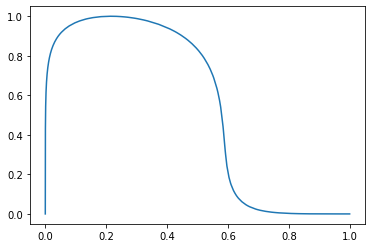

In [21]:
L = 400
H = entropy_data[L]
p = np.linspace(1/(L*L), 1, L*L)
plt.plot(p, H)
H_max = np.max(H)

In [90]:
for L in entropy_data.keys():
    entropy_data[L] /= np.max(entropy_data[L])
#     entropy_data[L] /= H_max
    pass

### Normalizing data mainly Entropy

In [11]:
for L in data.keys():
    H = data[L].T[1]
    H /= H[0]
    data[L].T[1] = H

### selected lengths

In [12]:
selected_length = np.arange(200, 450, 50)
selected_length

array([200, 250, 300, 350, 400])

### color map

In [62]:
# cmap=plt.get_cmap('gray')

In [17]:
number = selected_length.shape[0]+2
cmap = plt.get_cmap('gnuplot')
colors = [cmap(i) for i in np.linspace(0, 1, number)]
colors

[(0.0, 0.0, 0.0, 1.0),
 (0.4058397249567139, 0.004468145735802971, 0.8597998514483723, 1.0),
 (0.5773502691896257, 0.03703703703703703, 0.8660254037844387, 1.0),
 (0.7084919084320762, 0.12647636278656021, 0.0, 1.0),
 (0.816496580927726, 0.2962962962962962, 0.0, 1.0),
 (0.9139442639718567, 0.5827982902503562, 0.0, 1.0),
 (1.0, 1.0, 0.0, 1.0)]

### plotting for one length

In [35]:
one_length = 400
p, H, P1, P2 = data[one_length].T
# H = entropy_data[one_length]/np.max(entropy_data[one_length])

In [ ]:
# n = 3
# palette = sns.cubehelix_palette(n_colors=n,start=1.5, light=0.85, dark=0.3, hue=1, gamma=0.95, rot=0.5, reverse=True)
# sns.palplot(palette)

In [55]:
# # my_cmap = ListedColormap(sns.color_palette("cubehelix", 8).as_hex())
# sns.set()
# sns.set_palette(palette)

# styles = ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']
# sns.set_style(styles[4])

In [15]:
colors.reverse()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


../figures/sq_lattice_site_percolation_periodic_-entropy-order_parameter-L400.eps


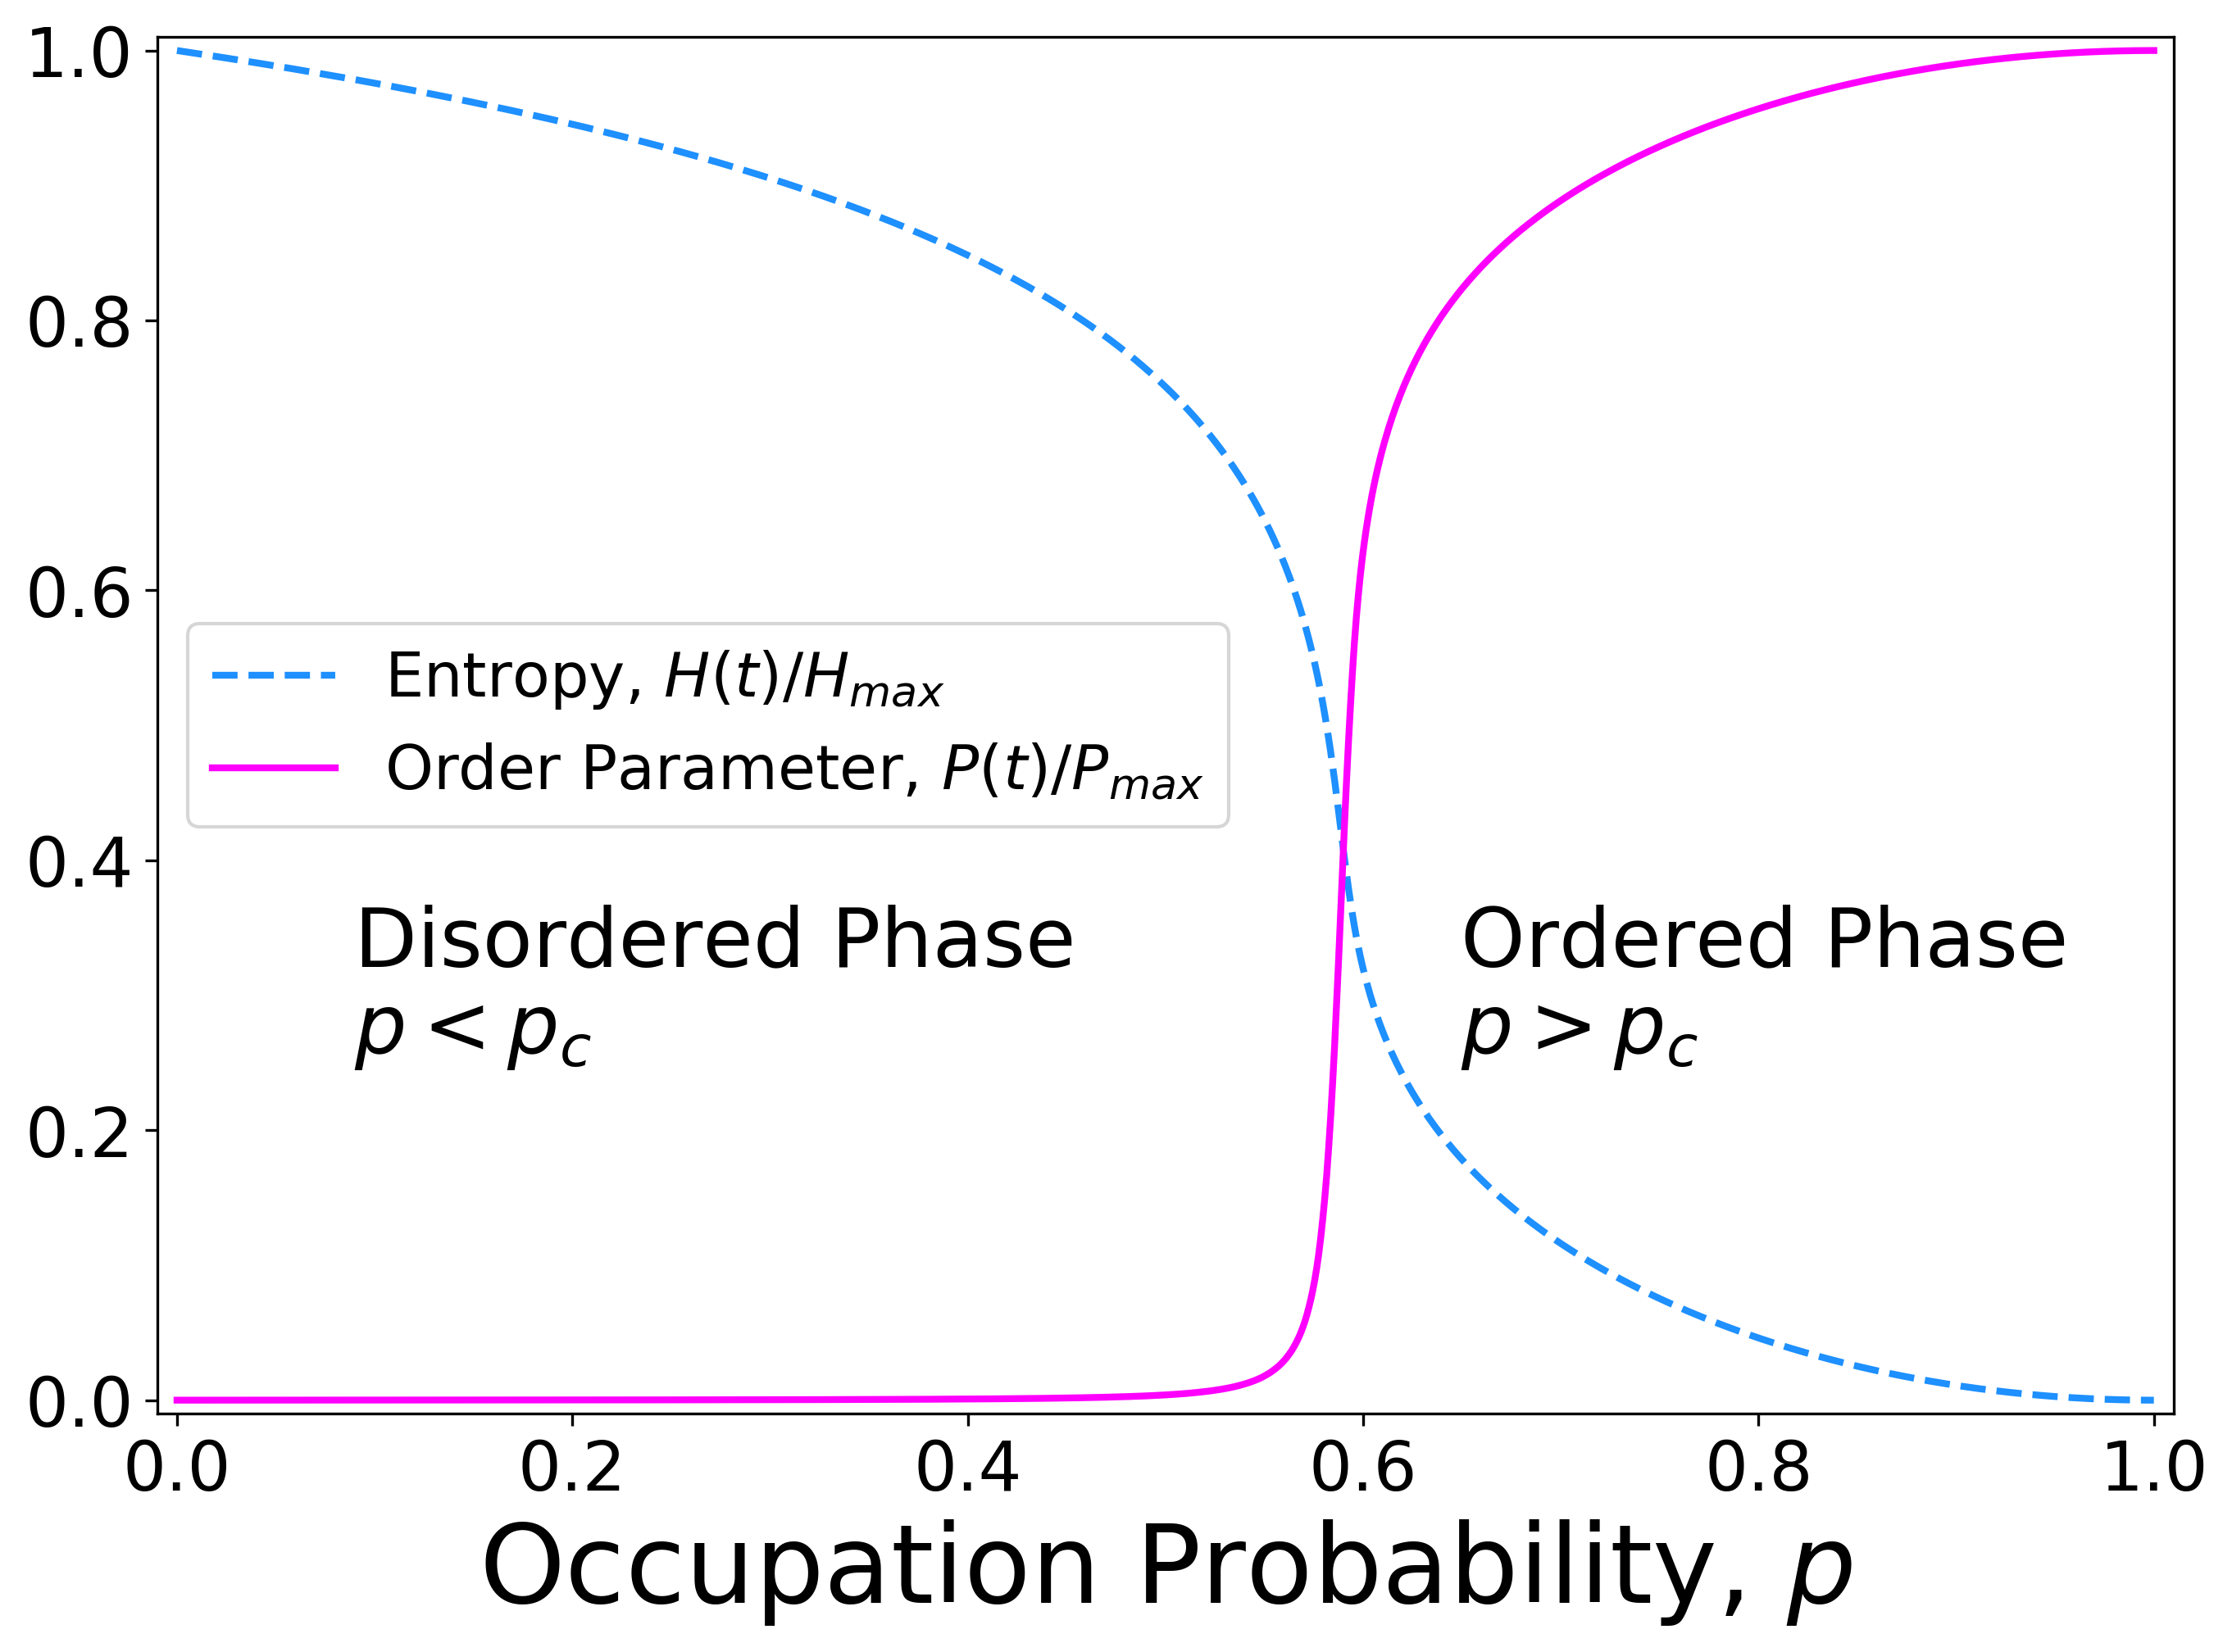

In [37]:
fig, ax = plt.subplots(figsize=(10,7),  dpi=300, constrained_layout=False)

i = 0
indices = np.linspace(0, p.shape[0]-1, 1000, dtype=int)

ax.plot(p[indices], H[indices], '--', label=r'Entropy, $H(t)/H_{max}$' , color=colors[1], linewidth=2)
ax.plot(p[indices], P1[indices], '-', label=r'Order Parameter, $P(t)/P_{max}$', color=colors[-2],  linewidth=2)


ax.set_position([0.12, 0.14, 0.82, 0.8])

plt.tick_params(axis='both', which='major', labelsize=20)
plt.legend(loc=6, fontsize=18, )

plt.xlim(-0.01, 1.01)
plt.ylim(-0.01, 1.01)


fig.text(0.2, 0.4, "Disordered Phase", font_24)
fig.text(0.2, 0.35, r"$p < p_c$", font_24)

fig.text(0.65, 0.4, "Ordered Phase", font_24)
fig.text(0.65, 0.35, r"$p > p_c$", font_24)

# fig.tight_layout()
# fig.tight_layout(pad=0.7)
# fig.tight_layout(rect=(0,0,1,1))
plt.xlabel(r'Occupation Probability, $p$', font_32)
# plt.ylabel(r"$H/H_{max}$ , $P/P_{max}$", font_16)

filename = out_img_dir + signature + '-entropy-order_parameter-L{}.eps'.format(one_length)
# filename = out_img_dir + signature + '-entropy-order_parameter-traditional-L{}.eps'.format(one_length)
# filename = out_img_dir + signature + '-entropy-order_parameter-reversed2-all-L.eps'
plt.savefig(filename)
print(filename)
